# Signal Generation

This notebook generates signals used as samples in other notebooks.

In [1]:
import numpy as np
# from scipy.fftpack import fft
import matplotlib.pyplot as plt
from synthetic import create_concatenated_sines, create_mixed_sines
# import matplotlib
# import pywt
# import pandas as pd

## Mixed and composite sinusoidal signals

In [2]:
frequencies = [4, 30, 60, 90]
total_time = 1
number_of_samples = 100000

In [3]:
time_array, mixed_signal = create_mixed_sines(frequencies, total_time, number_of_samples)

In [4]:
time_array, composite_signal = create_concatenated_sines(frequencies, total_time, number_of_samples)

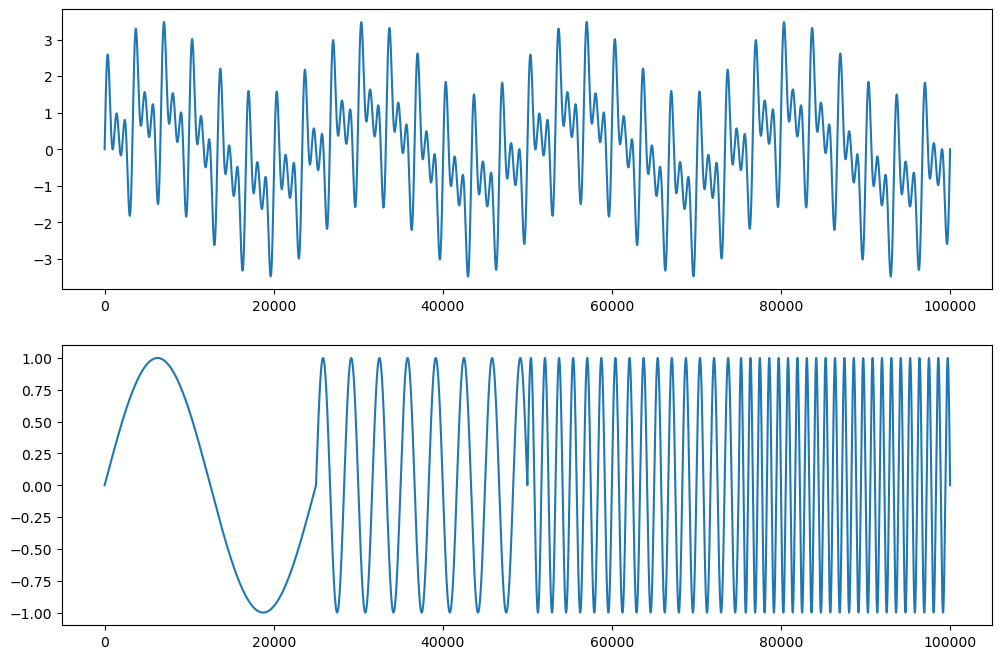

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(mixed_signal)
ax[1].plot(composite_signal)

## Cardiac Action Potential Signal

from https://github.com/zoccoler/metroid/blob/master/Simulated_Data/Simulated_AP_video_generation.ipynb

In [8]:
total_time = 2    # (in seconds)
sampling_frequency = 5000#67.8               # sampling frequency (in Hz); max = 10kHz
time_shift = 0.7

n_samples = int((sampling_frequency*total_time) + 1) #number of samples
time_array = np.linspace(0, total_time, n_samples) #time vector

AP_original = np.loadtxt('datasets/AP.txt',delimiter='\t')

AP_original[:,0] = AP_original[:,0]/1000                       #ms to sec
xvals = np.arange(AP_original[0,0], AP_original[-1,0], 0.0001) #generate a time vetor with a constant sampling frequency
yinterp = np.interp(xvals, AP_original[:,0], AP_original[:,1]) #interpolate values where original AP time data is missing
idx_shift = np.argmin(abs(time_array-time_shift))
yinterp2 = np.interp(time_array, xvals, yinterp)   #interpolate (subsample) data to experimental video sampling frequency   
signal = np.roll(yinterp2,idx_shift)                  #shift AP onset from 0 to 0.5sec
signal = signal+abs(signal[-1])                          #shift amp from ~-80 to 0
signal = signal/np.amax(signal)                          #normalize amplitude
max_idx = np.argmax(abs(signal))              #index of maximal absolute amplitude

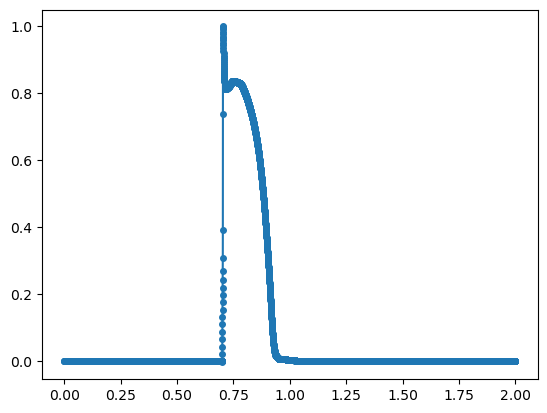

In [9]:
plt.plot(time_array, signal, '-o', ms=4)